In [1]:
import pandas as pd
import numpy as np
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk, spacy, re, string, unicodedata, contractions
from spacy_langdetect import LanguageDetector
from spacy.language import Language
import pkg_resources
from symspellpy import SymSpell, Verbosity
from scispacy.abbreviation import AbbreviationDetector
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')

/Users/sammy/opt/anaconda3/envs/NLP_Diaster_Tweets_June2022/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package wordnet to /Users/sammy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/sammy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from nltk.tokenize import TweetTokenizer

import preprocessor as p

1. Upload the data into Pandas


2. Clean the data.


3. Build a tokenized list of words from the data.


4. Remove stop words, Lemetizing and Stemming, remove words with less frequency(Outliers)


5. Feature Extraction


6. Apply a Logistic Regression model using a feature extraction algorithm bag of words (CountVectorizer)


7. Apply a Logistic Regression model using feature extraction algorithm TfidfVectorizer. (later)


8. Compare the output of each model above. (later)


9. Apply SVM(support vector machine predictor) to bag of words (CountVectorizer) and compare the output with No6 above. (later)


10. Apply SVM(support vector machine predictor) to bag of n-grams model and compare the output with No7 above. (later)

In [3]:
# importing dataset

data = pd.read_csv('train.csv') 


# Reviewing the data shape, columns and stats 

display(data.shape)
display(data.info())
data.describe()

(7613, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


None

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [4]:
# Overview of descriptive statistics 

data.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [5]:
# Percentage of Data Missing Per Column Above 1%

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] > .01][:152]

,Total,Missing Percent
location,2533,33.272035
keyword,61,0.801261


In [6]:
sentences = data['text'].tolist()

In [7]:
sentences

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ',
 '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires',
 '#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas',
 "I'm on top of the hill and I can see a fire in the woods...",
 "There's an emergency evacuation happening now in the building across the street",
 "I'm afraid that the tornado is coming to our area...",
 'Three people died from the heat wave so far',
 'Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA 

In [8]:
len(sentences)

7613

In [9]:
sentences_as_one_string = ''.join(sentences)

In [10]:
#!pip install WordCloud

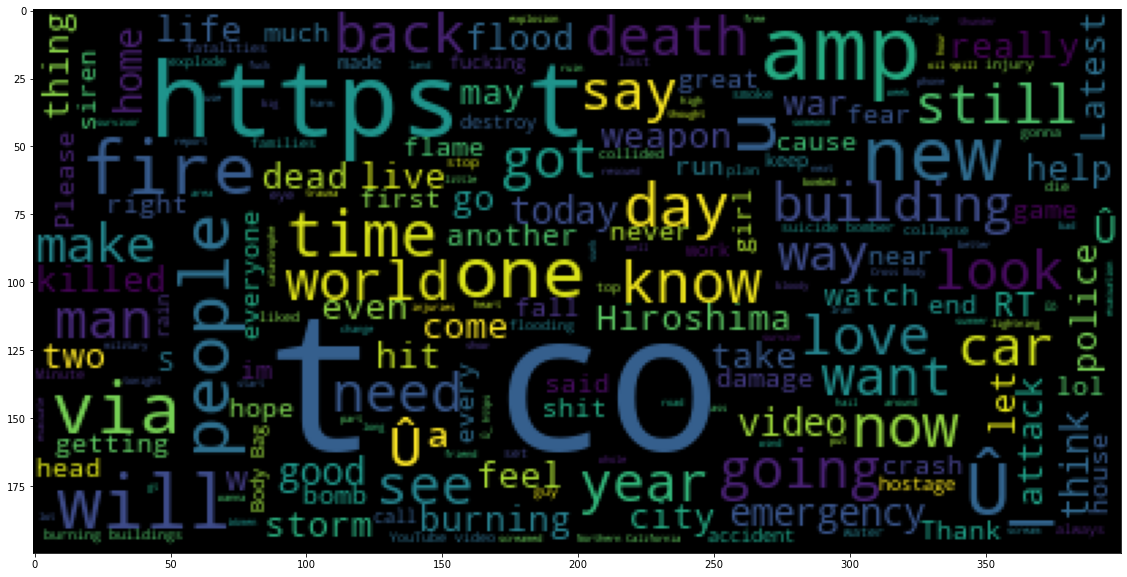

In [11]:
from wordcloud import WordCloud

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [12]:
# Drop multiple columns by name

data = data.drop(['id'], axis = 1)

In [13]:
data.head()

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [14]:
# Reviewing the top 15 value counts in each column

for col in data.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(data[col].value_counts().head(25))


----------------------------------------keyword---------------------------------------- - 

fatalities     45
deluge         42
armageddon     42
damage         41
body%20bags    41
harm           41
sinking        41
fear           40
evacuate       40
collided       40
outbreak       40
siren          40
twister        40
windstorm      40
weapon         39
derailment     39
wreckage       39
weapons        39
wrecked        39
sinkhole       39
famine         39
explosion      39
earthquake     39
sunk           39
whirlwind      39
Name: keyword, dtype: int64

----------------------------------------location---------------------------------------- - 

USA                 104
New York             71
United States        50
London               45
Canada               29
Nigeria              28
UK                   27
Los Angeles, CA      26
India                24
Mumbai               22
Washington, DC       21
Kenya                20
Worldwide            19
Chicago, IL          18
Australia            18
California           17
California, USA      15
New York, NY         15
Everywhere           15
Florida              14
San Francisco        14
United Kingdom       14
Washington, D.C.     13
Indonesia            13
Los Angeles          13
Name: location, dtype: int64

----------------------------------------text---------------------------------------- - 

11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...        10
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_     6
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'                               6
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam                      6
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives                                                                                  5
To fight bioterrorism sir.                                                                                                                       4
that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this

----------------------------------------target---------------------------------------- - 

0    4342
1    3271
Name: target, dtype: int64

In [21]:
nlp = spacy.load("en_core_web_lg", disable = ["parser", "ner"])



sym_spell = SymSpell(max_dictionary_edit_distance = 3, prefix_length = 7)

dictionary_path = pkg_resources.resource_filename("symspellpy", 
                                                  "frequency_dictionary_en_82_765.txt")
# term_index is the column of the term and count_index is the
# column of the term frequency

sym_spell.load_dictionary(dictionary_path, term_index = 0, count_index = 1)



def to_lowercase(text):
    return text.lower()

def remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()

def standardize_accented_chars(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def remove_url(text):
    return re.sub(r'https?:\S*', ' ', text)

def expand_contractions(text):
    expanded_words = [] 
    for word in text.split():
        expanded_words.append(contractions.fix(word)) 
    return ' '.join(expanded_words)

def remove_mentions_and_tags(text):
    text = re.sub(r'@\S*', ' ', text)
    return re.sub(r'#\S*', ' ', text)

def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]'
    return re.sub(pat, ' ', text)

def remove_numbers(text):
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, ' ', text)

def remove_punctuation(text):
    return ''.join([c for c in text if c not in string.punctuation])

# def replace_acronyms(text):
#     doc = nlp(text)
#     altered_tok = [tok.text for tok in doc]
#     for abrv in doc._.abbreviations:
#         altered_tok[abrv.start] = str(abrv._.long_form)

#     return(" ".join(altered_tok))




# sym_spell = SymSpell(max_dictionary_edit_distance = 3, prefix_length = 7)

# dictionary_path = pkg_resources.resource_filename("symspellpy", 
#                                                   "frequency_dictionary_en_82_765.txt")
# # term_index is the column of the term and count_index is the
# # column of the term frequency

# sym_spell.load_dictionary(dictionary_path, term_index = 0, count_index = 1)


def spell_checker(text):
    
    clean_text = []
    
    for word in text.split():
        suggestion = sym_spell.lookup(word, Verbosity.CLOSEST, include_unknown = True)
        clean_text.append(suggestion[0].term)
    return ' '.join(clean_text)

# def low_occurence_word(text):
#     freq = pd.Series(' '.join(data['text']).split()).value_counts()
#     low_freq = list(freq.loc[freq < 5].index)
#     data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in low_freq))


def remove_stopwords(text): 
    
    filtered_sentence = [] 
    
    doc = nlp(text)
    
    for token in doc:
        if token.is_stop == False:
            filtered_sentence.append(token.text)   
            
    return ' '.join(filtered_sentence)



def lemmatize(text):
    
    doc = nlp(text)
    
    lemmatized_text = []
    
    for token in doc:
        lemmatized_text.append(token.lemma_)
        
    return ' '.join(lemmatized_text)

# Primary Processing Function

In [22]:
def text_preprocesser_nlp(text):
    
    clean = text
    clean = to_lowercase(clean)
    clean = remove_html_tags(clean)
    clean = standardize_accented_chars(clean)
    clean = remove_url(clean)
    clean = expand_contractions(clean)
    clean = remove_mentions_and_tags(clean)
    clean = remove_special_characters(clean)
    clean = remove_numbers(clean)
    clean = remove_punctuation(clean)
#    clean = replace_acronyms(clean)
    clean = spell_checker(clean)
    clean = remove_stopwords(clean)
    clean = lemmatize(clean)
    
    return clean

In [23]:
sample = data.text[100]

In [24]:
sample

'.@NorwayMFA #Bahrain police had previously died in a road accident they were not killed by explosion https://t.co/gFJfgTodad'

In [25]:
text_preprocesser_nlp(sample)

/Users/sammy/opt/anaconda3/envs/NLP_Diaster_Tweets_June2022/lib/python3.7/site-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


'police previously die road accident kill explosion'

In [26]:
data['test'] = data.text.apply(lambda text: text_preprocesser_nlp(text))

/Users/sammy/opt/anaconda3/envs/NLP_Diaster_Tweets_June2022/lib/python3.7/site-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


# Hashtag and Mention Extraction using Regex

List of all hashtags and mentions to two new column as a new feature hashtag and mentions

In [15]:
data['hashtag'] = data['text'].apply(lambda x: re.findall(r'#(\w+)', x))

In [16]:
data['mentions'] = data['text'].str.findall(r'[＠@]([^][\s#<>|{}]+)') 

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
 4   hashtag   7613 non-null   object
 5   mentions  7613 non-null   object
dtypes: int64(1), object(5)
memory usage: 357.0+ KB


In [18]:
data['hashtag'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                          5870
[hot, prebreak, best]                         30
[GBBO]                                        11
[news]                                         9
[Hiroshima]                                    8
                                            ... 
[gym, gymflow, gymtime, team, assassins]       1
[Afghanistan, 2015]                            1
[Montgomery]                                   1
[GrowingUpSpoiled]                             1
[superfood]                                    1
Name: hashtag, Length: 1358, dtype: int64

In [19]:
data['mentions'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                       5595
[YouTube]                  60
[Change]                    9
[djicemoon]                 7
[POTUS]                     6
                         ... 
[SuryaRay]                  1
[shakjn, C7, Magnums]       1
[aptly_engineerd]           1
[swb1192]                   1
[BizzleMahomie]             1
Name: mentions, Length: 1809, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
 4   hashtag   7613 non-null   object
 5   mentions  7613 non-null   object
dtypes: int64(1), object(5)
memory usage: 357.0+ KB


In [21]:
data.sample(frac = 0.1)

,keyword,location,text,target,hashtag,mentions
1844,crashed,Buenos Aires,MH370: Intact part lifts odds plane glided not...,1,[],[]
196,ambulance,NaN,#reuters Twelve feared killed in Pakistani air...,1,[reuters],[]
5695,rescued,NaN,Young children among those rescued from capsiz...,1,[],[IrishTimesWorld]
3352,evacuated,NaN,Ahrar Al Sham: In our negotiations with Iran o...,0,[],[]
808,blight,UK,The #Palestinian #refugee tragedy is a blight ...,1,"[Palestinian, refugee, Israeli]",[]
...,...,...,...,...,...,...
4091,hail,antoine fisher,@Hail_Zel man you kno I'm there !,0,[],[Hail_Zel]
4986,military,NaN,Ford : Other Military VERY NICE M151A1 MUTT wi...,0,[],[]
424,arsonist,SF Bay Area,#Arsonist arrested for setting many fires. WAT...,1,"[Arsonist, headlines, Nightbeat, 2MinuteMix]",[VeronicaDLCruz]
5969,screaming,Jariana Town,@justinbieber @ArianaGrande Can you hear me sc...,0,[],"[justinbieber, ArianaGrande]"


# Total Words and Total Unique Words

In [22]:
# Unique words
uniqueWords = list(set(' '.join(data['text']).lower().split(' ')))
count = len(uniqueWords)

# Total words
data['total_words'] = data['text'].str.split().str.len()
data['total_words'].sum()

113461

In [23]:
data.sample(frac = 0.1)

,keyword,location,text,target,hashtag,mentions,total_words
3586,fatal,Quincy,Man accused in fatal hit-and-run to get new ju...,0,[],[KHQA],12
2382,derail,Road to the Billionaires Club,@GloriaVelez GM! I pray any attack of the enem...,0,[],[GloriaVelez],26
531,avalanche,NaN,GREAT PERFORMANCE CHIP FUEL/GAS SAVER CHEVY TA...,0,[],[],9
4957,meltdown,Proudly frozen Canuck eh !!,@JustinTrudeau \n\nMost respected in world\nBe...,0,[],[JustinTrudeau],23
3695,fatality,NaN,Death of Loretta Fuddy responsible for authent...,1,[],[],18
...,...,...,...,...,...,...,...
5955,screaming,rio de janeiro | brazil,SCREAMING @MariahCarey @ArianaGrande http://t....,0,[],"[MariahCarey, ArianaGrande]",4
7300,wild%20fires,NaN,God forbid this is true #California has enough...,1,"[California, drought, wild, Nuclear, SanOnofre]",[],19
4368,hijacker,NaN,Complete Solution to Get Rid of http://t.co/9C...,0,[],[],14
2620,destruction,"Silesia, Poland",@LT3dave so many specs so much fan service so ...,0,[],[LT3dave],12


# Case-Standardization



- It is one of the most common preprocessing steps in NLP where the text is converted into the same case, more often than not into lower case.



- But this step can lead to information loss in some NLP tasks. For example, in a sentiment analysis task, words written in upper cases can signify strong emotions like anger, excitement, etc. In such cases, we might want to perform this step differently or may even avoid it.

# Tweet Tokenizer

In [88]:
# import TweetTokenizer() method from nltk
from nltk.tokenize import TweetTokenizer

# Create a reference variable for Class TweetTokenizer
tweet_tokenizer = TweetTokenizer()

In [89]:
# Use tokenize method

data['clean_text'] = data['text'].apply(tweet_tokenizer.tokenize) 

# Spell Check

In [ ]:
# https://symspellpy.readthedocs.io/en/latest/examples/index.html

In [169]:
import pkg_resources
from symspellpy import SymSpell, Verbosity

In [172]:
sym_spell = SymSpell(max_dictionary_edit_distance = 3, prefix_length = 7)

dictionary_path = pkg_resources.resource_filename("symspellpy", 
                                                  "frequency_dictionary_en_82_765.txt")
# term_index is the column of the term and count_index is the
# column of the term frequency

sym_spell.load_dictionary(dictionary_path, term_index = 0, count_index = 1)

In [175]:
suggestion = sym_spell.lookup('hour', Verbosity.CLOSEST)

# Removing HTML Tags


- Raw text may contain HTML tags especially if the text is exctracted using techniques like web or screen scraping. HTML tags noise and don’t add much value to understanding and analyzing text. Hence, they should be removed. We will use the BeautifulSoup library for removing HTML tags.

# Standardizing Accent Characters


- Sometimes, people use accented characters like é, ö, etc. to signify emphasis on a particular letter during pronunciation. In some instances, accent marks also clarify the semantics of words, which might be different without accent marks. Though you might encounter accented characters very rarely, it’s a good practice to convert these characters into standard ASCII characters.

In [145]:
def standardize_accented_chars(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

# Dealing with URLs


- Many times people use URLs, especially on social media, to provide extra information to the context. The URLs don’t generalize across samples and hence are noise. We can remove URLs using regular expressions.


- Note: 
    > In some tasks, URLs can add extra information to the data. For example, in a text classification task that aims to detect if a social media comment is an advertisement or not, the presence of URLs in a comment can provide useful information. In such a case, we can replace URLs with a custom token like <URL> or add an extra binary feature in the feature vector that corresponds to the presence of a URL.

In [148]:
def remove_url(text):
    return re.sub(r'https?:\S*', ' ', text)

# Expanding Contractions


- Contractions are shortened versions of words or syllables. They are created by removing, one or more letters from words. Sometimes, multiple words are combined to create a contraction. For example, I will is contracted into I’ll, do not into don’t. Considering I will and I’ll differently might result in poor performance of the model. Hence, it’s a good practice to convert each contraction into its expanded form. We can use the contractions library to convert contractions into their expanded form.

In [151]:
def expand_contractions(text):
    expanded_words = [] 
    for word in text.split():
        expanded_words.append(contractions.fix(word)) 
    return ' '.join(expanded_words)

# Removing Mentions and Hashtags


- This step comes into effect when dealing with social media text data, for example, Tweets. Mentions and hashtags don’t generalize across samples and are noise in most NLP tasks. Hence, it’s better to remove these.


- The above output might make much sense to humans but helps in improving the performance of models.


- Note: 
    > In this step, we are removing text that comes after ‘@’ and ‘#’. Also, this step should be performed
    before removing special characters(a step that we are going to look at next) from the text

In [154]:
def remove_mentions_and_tags(text):
    text = re.sub(r'@\S*', ' ', text)
    return re.sub(r'#\S*', ' ', text)

# Removing Special Characters


- Special characters are non-alphanumeric characters. The characters like %,$,&, etc are special. In most NLP tasks, these characters add no value to text understanding and induce noise into algorithms. We can use regular expressions for removing special characters.

# Removing Digits


- Digits in the text don’t add extra information to data and induce noise into algorithms. Hence, it’s a good practice to remove digits from the text. Again, we can use regex to achieve this task

# Removing Puncuations


- Again, puncuations don’t add extra information to data in NLP and hence, we remove them

 # Updating Abbreviations

In [166]:
def replace_acronyms(text):
    doc = nlp(text)
    altered_tok = [tok.text for tok in doc]
    for abrv in doc._.abbreviations:
        altered_tok[abrv.start] = str(abrv._.long_form)

    return(" ".join(altered_tok))

# Removing low occurrence words : 
    
> This step consists in removing words with a low occurrence because the discrimination between to the classes could be highest as it should if we keep them. Here I decided to remove the words that appears less than 5 times in the whole data set.

In [50]:
freq = pd.Series(' '.join(data['text']).split()).value_counts()
low_freq = list(freq.loc[freq < 5].index)
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in low_freq))

# Removing Stopwords


- Stopwords like I, am, me, etc, don’t add any information that can help in modeling. Keeping them adds noise and increases the dimensions of feature vectors badly affecting computation cost and model accuracy. Hence it is advisable to remove them. We will use the spacy library to remove stop words. Spacy has 326 words in the set of stop words. In some cases, we might want to add some custom stop words, i.e. the words that are stop words for our tasks but may not be in the spacy’s set of stop words. Also in some NLP tasks, we might want to remove some words from spacy’s stop words set. For example, in sentiment tasks, we would like to keep negation words like ‘not, neither, nor, etc’ in text, hence, we would remove them from spacy’s set of stop words.

In [71]:
def remove_stopwords(text): 
    
    nlp = spacy.load("en_core_web_lg", disable = ["parser", "ner"])
    
    filtered_sentence = [] 
    
    doc = nlp(text)
    
    doc
    
    for token in doc:
        if token.is_stop == False:
            filtered_sentence.append(token.text)   
            
    return ' '.join(filtered_sentence)

# Lemmatization


- Lemmatization generates the root form of words from their inflected forms. For example, for the root word ‘play’, ‘playing’ will be its inflected form. Notice that both play and playing mean almost the same and it would be better if our model considers playing the same as play. To achieve such conversions, we use lemmatization. Lemmatization makes use of vocabulary and morphological analysis of words, to generate the root form of a word. We will use the spaCy library for performing lemmatization.